# DL 회귀분석 정리
- toc:true

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt 

## 데이터 준비

In [ ]:
torch.manual_seed(43052)

ones= torch.ones(100)
x,_ = torch.randn(100).sort()
X = torch.stack([ones,x]).T # torch.stack([ones,x],axis=1)

In [ ]:
W = torch.tensor([2.5,4])

In [ ]:
ϵ = torch.randn(100)*0.5 # 입실론은 오차를 의미함

In [ ]:
y = X @ W + ϵ

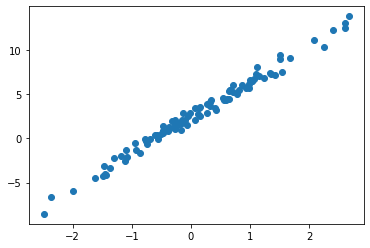

In [ ]:
plt.plot(x, y, 'o')

## 가중치와 bias 준비

In [ ]:
What = torch.tensor([-5.0,10.0],requires_grad=True)
What

tensor([-5., 10.], requires_grad=True)

In [ ]:
yhat = X @ What 

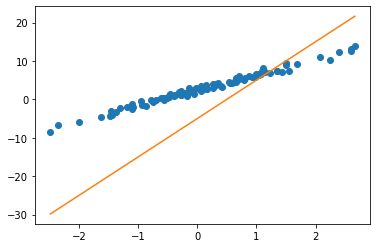

In [ ]:
plt.plot(x, y, 'o')
plt.plot(x, yhat.data, '-')

## 노란선으로 파란선을 맞춰야 함, 맞추기 위해서는 얼마나 틀렸는지를 알아야 함 -> loss function

`-` $loss=\sum_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum_{i=1}^{n}(y_i-(\hat{w}_0+\hat{w}_1x_i))^2 =  ({\bf y}-{\bf\hat{y}})^\top({\bf y}-{\bf\hat{y}})=({\bf y}-{\bf X}{\bf \hat{W}})^\top({\bf y}-{\bf X}{\bf \hat{W}})$

궁극적으로 조합 $(\hat{w}_0,\hat{w}_1)$에 대하여 가장 작은 loss를 찾아내야 함

`-` 찾는 방법: loss를 미분하여 기울기를 얻는다 $\to$ 기울기 부호의 반대 방향으로 이동한다. $\to$ 움직이는 보폭(크기)은 (loss미분값 * 학습률(lr, α))

`-` ${\bf W} \leftarrow {\bf W} - \alpha \times \frac{\partial}{\partial {\bf W}}loss(w_0,w_1)$

`-` $\frac{\partial}{\partial {\bf W}}loss(w_0,w_1)$ 이 값은 아래의 코드를 통해 계산할할 수 있다.
``` python
loss.backward()
```

`-` 위에서 계산한 미분값은 W.grad를 통해 확인할 수 있다.

`-` 정리하자면 loss를 정의한 후
```python
W = W - 학습률 * W.grad
```

`+` W를 업데이트한 후 W.grad = None을 해줘야 함
`+` 미분을 통해 업데이트를 하기 위해서는 아래와 같은 옵션을 주어야 한다.
``` python
torch.tensor([-5.0,10.0],requires_grad=True)
```


## 훈련 방법

### 학습 방법과 선형회귀 step별 다양한 표현 방법

In [ ]:
alpha=0.001 
for epoc in range(30): ## 30번 반복합니다!! 
    # step 1
    yhat=X@What # w와 b를 만드는 
                # type1) torch.nn.Linear(input, ouput, bias=True) X에 1로 구성된 열이 없을때 사용
                # type2) torch.nn.Linear(input + 1, ouput, bias=False) X에 1로 구성된 열이 있있을때 사용
    
    # step 2
    loss=torch.sum((y-yhat)**2) # loss = torch.nn.MSELoss(yhat, y)
    
    # step 3
    loss.backward() 

    # step 4 -> optimizer를 사용 # optim = torch.optim.SGD(net.parameters(),lr=1/10) 이런 식으로 선언 # net.parameters()는 optimizer에 업데이트할 변수를 지정 # lr은 학습률 지정
    What.data = What.data-alpha * What.grad # optim.step()
    What.grad=None # optim.zero_grad()

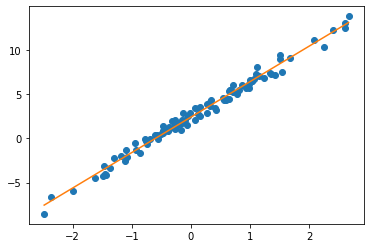

In [ ]:
plt.plot(x, y, 'o')
plt.plot(x, yhat.data, '-')

### 훈련과정 기록하기

In [ ]:
loss_history = [] # 기록하고 싶은것 1  
yhat_history = [] # 기록하고 싶은것 2 
What_history = [] # 기록하고 싶은것 3

What= torch.tensor([-5.0,10.0],requires_grad=True)

alpha=0.001 

for epoc in range(30): 
    #
    yhat=X@What ; yhat_history.append(yhat.data.tolist())
    #
    loss=torch.sum((y-yhat)**2); loss_history.append(loss.item())
    #
    loss.backward() 
    #
    What.data = What.data-alpha * What.grad; What_history.append(What.data.tolist())
    What.grad=None

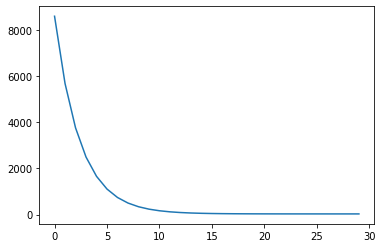

In [ ]:
plt.plot(loss_history)

## 정리
`-` 학습률이 너무 크면 스텝이 너무 커서 loss의 순간기울기가 0이 되는 점을 찾지 못할 수 있다. (학습률이 너무 작으면 loss의 순간기울기가 0이 되는 점을 찾을 수는 있지만 학습시간이 오래 걸린다는 단점이 있음)

`-` local minimum과 global minimum이 있는 loss 곡선은 초기 W가 중요하다.
